In [1]:

import argparse
import pickle
import gzip
from collections import Counter, defaultdict
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import MaxPool2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.core import Reshape
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



import matplotlib.pyplot as plt

from collections import defaultdict

%matplotlib inline
import json
plt.style.use('ggplot')

Using TensorFlow backend.


In [2]:
class Numbers:
    """
    Class to store MNIST data
    """

    def __init__(self, location):
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
        self.train_x, self.train_y = train_set
        self.test_x, self.test_y = valid_set


In [3]:

class CNN:
    '''
    CNN classifier
    '''
    def __init__(self, train_x, train_y, test_x, test_y, history, epochs = 15, batch_size=128, activation="relu" ):
        '''
        initialize CNN classifier
        '''
        self.batch_size = batch_size
        self.epochs = epochs

        print (len(train_x))
        print (len([elem for elem in train_x]))
        # TODO: reshape train_x and test_x
        # reshape our data from (n, length) to (n, width, height, 1) which width*height = length
        #self.train_x = np.array(np.array([train_x[i:i + 28] for i in range(0, len(train_x), 28)]))
        #self.train_x = np.array([[elem[i:i + 28] for i in range(0, len(elem), 28)] for elem in train_x])
        #self.test_x = np.array([[elem[i:i + 28] for i in range(0, len(elem), 28)] for elem in test_x])
        self.train_y = np.array(train_y)
        self.test_y = np.array(test_y)
        
        # input image dimensions
        img_x, img_y = 28, 28
        input_shape = (img_x, img_y, 1)
        
        # TODO: reshape train_x and test_x
        self.train_x = train_x.reshape(train_x.shape[0], img_x, img_y, 1)
        self.test_x = test_x.reshape(test_x.shape[0], img_x, img_y, 1)
        

        print (self.train_x.shape, self.test_x.shape, self.train_y.shape, self.test_y.shape)
        #print (self.train_x[0], self.test_x[0], self.train_y[0], self.test_y[0])


        # normalize data to range [0, 1]
        #self.train_x /= 255
        #self.test_x /= 255
        #print (self.train_x[0], self.test_x[0], self.train_y[0], self.test_y[0])


        # TODO: one hot encoding for train_y and test_y
        num_classes = len(set(train_y))
        one_hot_train_y = [ [0 if elem != idx else 1 for idx in range(num_classes) ] for elem in train_y]
        one_hot_test_y = [ [0 if elem != idx else 1 for idx in range(num_classes) ] for elem in test_y]
        self.train_y = one_hot_train_y
        self.test_y =  one_hot_test_y
        
    
    


        # TODO: build you CNN model
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
        model.add(MaxPool2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.50))
        model.add(Dense(10, activation='softmax'))
        model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])

        self.model = model
        
        

        
    def train(self):
        '''
        train CNN classifier with training data
        :param x: training data input
        :param y: training label input
        :return:
        '''
        # TODO: fit in training data
        self.model.fit(self.train_x, self.train_y,
          batch_size=self.batch_size,
          epochs=self.epochs,
          verbose=1,
          validation_data=(self.test_x, self.test_y),
          callbacks=[history])

    def evaluate(self):
        '''
        test CNN classifier and get accuracy
        :return: accuracy
        '''
        acc = self.model.evaluate(self.test_x, self.test_y)
        return acc


In [4]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

In [5]:
#parser = argparse.ArgumentParser(description='CNN classifier options')
#parser.add_argument('--limit', type=int, default=-1,help='Restrict training to this many examples')
#args = parser.parse_args()

data = Numbers("../data/mnist.pkl.gz")

print ( data.train_x.shape, data.test_x.shape, data.train_y.shape, data.test_y.shape )


limit = 50000


history = AccuracyHistory()
epochs = 15
cnn = CNN(data.train_x[:limit], data.train_y[:limit], data.test_x, data.test_y, history, epochs = epochs, batch_size=32)
cnn.train()
acc = cnn.evaluate()
print(acc)

(50000, 784) (10000, 784) (50000,) (10000,)
50000
50000
(50000, 28, 28, 1) (10000, 28, 28, 1) (50000,) (10000,)
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 212s - loss: 0.7079 - acc: 0.7744 - val_loss: 0.2248 - val_acc: 0.9342
Epoch 2/15
50000/50000 [==============================] - 222s - loss: 0.3281 - acc: 0.8990 - val_loss: 0.1555 - val_acc: 0.9565
Epoch 3/15
50000/50000 [==============================] - 220s - loss: 0.2517 - acc: 0.9243 - val_loss: 0.1233 - val_acc: 0.9660
Epoch 4/15
50000/50000 [==============================] - 219s - loss: 0.2100 - acc: 0.9367 - val_loss: 0.1051 - val_acc: 0.9686
Epoch 5/15
50000/50000 [==============================] - 221s - loss: 0.1769 - acc: 0.9471 - val_loss: 0.0876 - val_acc: 0.9764
Epoch 6/15
50000/50000 [==============================] - 226s - loss: 0.1587 - acc: 0.9523 - val_loss: 0.0793 - val_acc: 0.9774
Epoch 7/15
50000/50000 [==============================] - 195s -

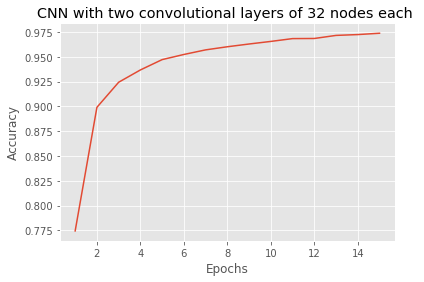

In [6]:
plt.plot(range(1,epochs+1), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN with two convolutional layers of 32 nodes each ')
plt.show()

In [ ]:
print(cnn.model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [ ]:
activation_results = []
for act_fcn in [ 'tanh', 'sigmoid', 'softmax', 'linear', 'relu' ]:
    history = AccuracyHistory()
    epochs = 50
    history = AccuracyHistory()
    cnn = CNN(data.train_x[:limit], data.train_y[:limit],\
              data.test_x, data.test_y, history, epochs = epochs, batch_size=32, activation=act_fcn)
    cnn.train()
    acc = cnn.evaluate()
    print(acc)
    activation_results.append( (act_fcn, acc, history))

50000
50000
(50000, 28, 28, 1) (10000, 28, 28, 1) (50000,) (10000,)
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
33472/50000 [===================>..........] - ETA: 56s - loss: 0.7912 - acc: 0.7487

In [ ]:
ar_save = activation_results
activation_results = [xx for xx in activation_results if xx[0]!='linear']

In [ ]:
print (activation_results)

In [ ]:
activation_results = [xx for xx in activation_results if xx[0]!='linear']
labels = [ 'tanh', 'sigmoid', 'softmax', 'linear', 'relu' ]
for idx, label in enumerate(labels):
    activation_results[idx] = list( activation_results[idx])
    activation_results[idx][0] = label

In [ ]:
activation_results = [xx for xx in activation_results if xx[0]!='linear']
activation_results = [xx for xx in activation_results if xx[0]!='softmax']

In [ ]:
activation_results[0][2].acc

In [ ]:
import seaborn as sns

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.set_style("whitegrid")

x_vals = [xx[0] for xx in activation_results]
x = range(len(x_vals))
y_test_acc = [xx[1][1] for xx in activation_results]


#ax.bar(x, y_train_acc)
ax.bar(x, y_test_acc)

ax.set_xticks(x)
ax.set_xticklabels(x_vals)

ax.set_xlabel('Activation Fucntion')
ax.set_ylabel('Test Accuracy after 50 epochs')


      
ax.set_ylim(0.50,1.00)



plt.title('HW3 1.2 Accuracy versus activation function')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()
plt.clf()
plt.close(fig)

In [ ]:
### Plot accuacy versus epoch for activation functions
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.set_style("whitegrid")

x = range(len(activation_results[0][2].acc))
y_vals = [xx[2].acc for xx in activation_results]
y_labels =  [xx[0] for xx in activation_results]


line1, = ax.plot(x, y_vals[0] , lw=2, label=y_labels[0])
line2, = ax.plot(x, y_vals[1] , lw=2, label=y_labels[1])
line3, = ax.plot(x, y_vals[2] , lw=2, label=y_labels[2])



ax.set_xlabel('Epochs')
ax.set_ylabel('Test Accuracy')

      
ax.set_ylim(0.0,1.00)


plt.title('HW3 1.2 Accuracy Versus Epochs for three activation functions')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()
plt.clf()
plt.close(fig)

In [ ]:
activation_results = []
act_fcn = 'relu'
for batch_size in [ 32, 64, 128, 256, 512 ]:
    Print ("Batch size", batch_size)
    history = AccuracyHistory()
    epochs = 20
    history = AccuracyHistory()
    cnn = CNN(data.train_x[:limit], data.train_y[:limit],\
              data.test_x, data.test_y, history, epochs = epochs, batch_size=batch_size, activation=act_fcn)
    cnn.train()
    acc = cnn.evaluate()
    print(acc)
    activation_results.append( (act_fcn, acc, history))

In [ ]:
for idx, label in enumerate([ 32, 64, 128, 256, 512 ]):
    activation_results[idx] = list( activation_results[idx])
    activation_results[idx][0] = label

In [ ]:

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.set_style("whitegrid")

x_vals = [xx[0] for xx in activation_results]
x = range(len(x_vals))
y_test_acc = [xx[1][1] for xx in activation_results]
y_labels =  [xx[0] for xx in activation_results]



#ax.bar(x, y_train_acc)
ax.bar(x, y_test_acc)

ax.set_xticks(x)
ax.set_xticklabels(x_vals)

ax.set_xlabel('Batch Size')
ax.set_ylabel('Test Accuracy after 20 epochs')


      
ax.set_ylim(0.50,1.00)



plt.title('HW3 1.2 Accuracy versus batch size')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()
plt.clf()
plt.close(fig)

In [ ]:
### Plot accuacy versus epoch for batch sizes
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.set_style("whitegrid")

x = range(len(activation_results[0][2].acc))
y_vals = [xx[2].acc for xx in activation_results]
y_labels =  [xx[0] for xx in activation_results]


line1, = ax.plot(x, y_vals[0] , lw=2, label=y_labels[0])
line2, = ax.plot(x, y_vals[1] , lw=2, label=y_labels[1])
line3, = ax.plot(x, y_vals[2] , lw=2, label=y_labels[2])
line4, = ax.plot(x, y_vals[3] , lw=2, label=y_labels[3])
line5, = ax.plot(x, y_vals[4] , lw=2, label=y_labels[4])



ax.set_xlabel('Epochs')
ax.set_ylabel('Test Accuracy')

      
ax.set_ylim(0.0,1.00)


plt.title('HW3 1.2 Accuracy Versus Epochs for different batch sizes')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()
plt.clf()
plt.close(fig)